In [106]:
import pandas as pd
import random as rnd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline


In [107]:
df = pd.read_csv('../datasets/weather/jp_weather.csv',decimal=",")
df = df.drop('Value', axis = 1)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=["Date"])
df['Celsius'] = pd.to_numeric(df['Celsius'])
df['Celsius'] = df['Celsius'].round(2)


In [108]:
#saving latitude and longitude to a list of dictionary
stations = df['Station'].unique()
Positions = []
for station in stations:
    #display(station ,df[df['Station'] == station][['LAT']][:1].values[0][0])
    Positions.append({'loc':[df[df['Station'] == station][['LAT']][:1].values[0][0], df[df['Station'] == station][['LON']][:1].values[0][0]],
                      'station':station})

In [109]:
# Making a map using the folium module
import folium
jp_map = folium.Map()

# Adding markers to the map
for position in Positions:
    marker = folium.Marker(location=position['loc'], popup=position['station']+" STATION")
    marker.add_to(jp_map)

# The last object in the cell always gets shown in the notebook
jp_map

In [110]:
# Japan mean temperature 
df.describe()

,Celsius
count,100000.000000
mean,15.402511
std,9.177219
min,-17.390000
25%,8.560000
50%,16.110000
75%,22.940000
max,35.890000


#### Tokyo International Airport

In [111]:
tokyo_intl_df =  df[df['Station']=='TOKYO INTL'] 

tokyo_intl_df.describe()

,Celsius
count,1000.000000
mean,17.345110
std,7.691579
min,1.560000
25%,10.390000
50%,17.280000
75%,23.780000
max,31.610000


Text(0.5, 1.0, 'Tokyo International Airport mean temp')

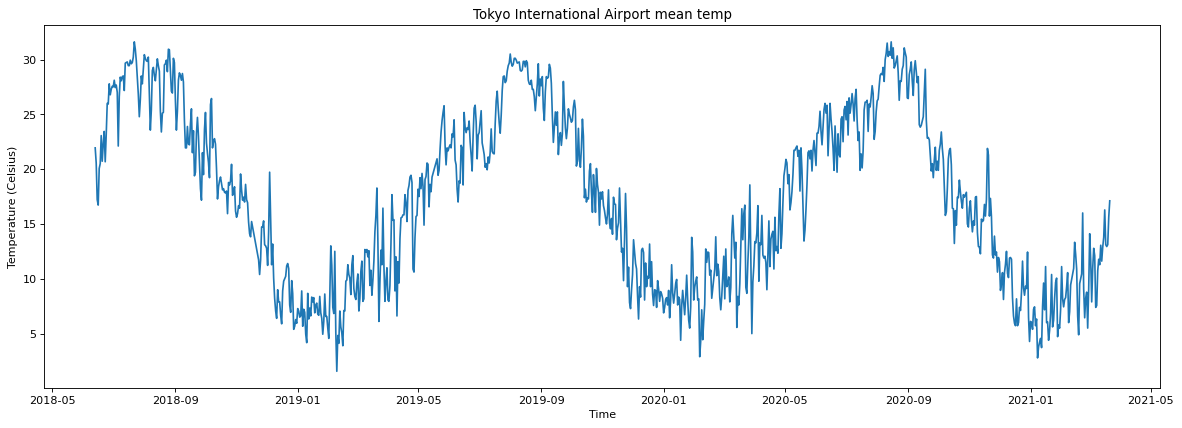

In [112]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(tokyo_intl_df['Date'], tokyo_intl_df['Celsius'])
plt.xlabel('Time')
plt.ylabel('Temperature (Celsius)')
plt.title('Tokyo International Airport mean temp')

In [113]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(tokyo_intl_df['Celsius'])
print(results)
print('p-value: ' + str(results[1]))

# H0: the series is non-stationary (there's strong seasonality within)
if (results[1] > 0.05):
    print("Cannot reject H0, series is non-stationary, can be represented by a unit root, has some time dependent structure")
else:
    print('Reject H0, series is stationary')

(-1.9286550796246564, 0.31870322499477444, 18, 981, {'1%': -3.4370334797663844, '5%': -2.8644907213150725, '10%': -2.568341114581742}, 4178.2575176931205)
p-value: 0.31870322499477444
Cannot reject H0, series is non-stationary, can be represented by a unit root, has some time dependent structure


In [114]:
from statsmodels.tsa.stattools import adfuller
def adf_test(val):
    results = adfuller(val)
    print(results)
    print('p-value: ' + str(results[1]))

    # H0: the series is non-stationary (there's strong seasonality within)
    if (results[1] > 0.05):
        print("Cannot reject H0, series is non-stationary, can be represented by a unit root, has some time dependent structure")
    else:
        print('Reject H0, series is stationary')



#### Tokyo Heliport

In [115]:
tokyo_heliport_df =  df[df['Station']=='TOKYO HELIPORT'] 
tokyo_heliport_df.describe()

,Celsius
count,1000.000000
mean,18.433080
std,7.874053
min,0.780000
25%,11.220000
50%,18.330000
75%,25.220000
max,33.110000


Text(0.5, 1.0, 'Tokyo Heliport mean temp')

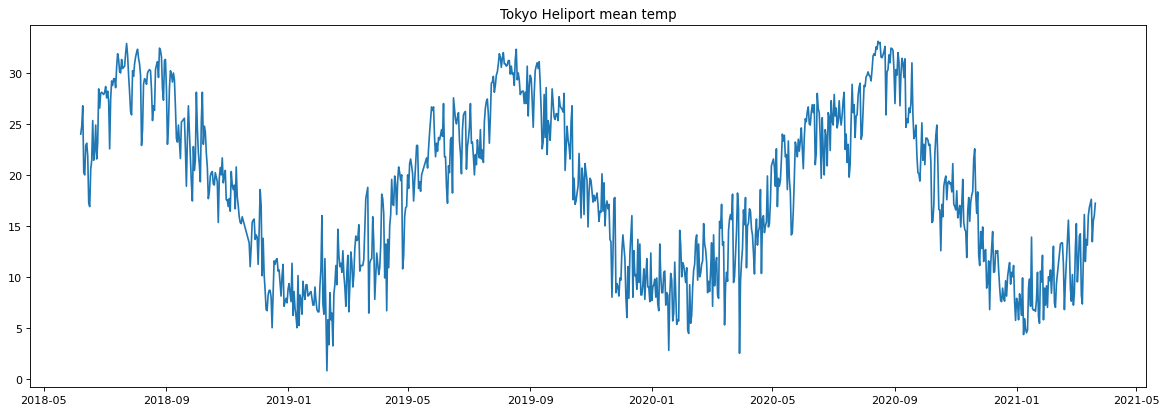

In [116]:
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(tokyo_heliport_df['Date'], tokyo_heliport_df['Celsius'])
plt.title('Tokyo Heliport mean temp')

In [117]:
from sklearn.model_selection import train_test_split
X = tokyo_heliport_df['Date']
y = tokyo_heliport_df['Celsius']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

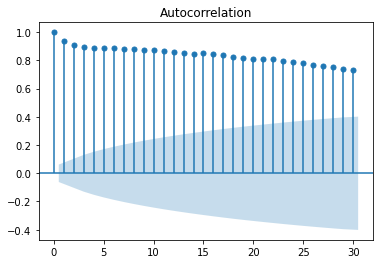

In [118]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
#y = np.random.rand(100)
plot_acf(y)
pyplot.show()

# temperatures are strongly correlated, past temps influence future temps.

### Rolling regression

In [119]:
x = np.arange(0,100)
y = (np.sin(x)+1)*10+2*x+np.random.rand(100)*5

points = 12
names = []
for i in range(points):
  names.append("a"+str(i))
ds = []
target = []
for i in range(points,len(x)-1):
  ds.append(y[i-points:i])
  target.append(y[i]) 
df = pd.DataFrame(np.array(ds),columns=names) 
dfy = df 
dfy["target"] = target

In [120]:
dfy[names]

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11
0,10.569281,21.035399,24.976620,18.941572,14.906315,12.958625,20.947397,33.924327,39.953784,36.595613,25.954702,26.235516
1,21.035399,24.976620,18.941572,14.906315,12.958625,20.947397,33.924327,39.953784,36.595613,25.954702,26.235516,31.784162
2,24.976620,18.941572,14.906315,12.958625,20.947397,33.924327,39.953784,36.595613,25.954702,26.235516,31.784162,41.034668
3,18.941572,14.906315,12.958625,20.947397,33.924327,39.953784,36.595613,25.954702,26.235516,31.784162,41.034668,51.306295
4,14.906315,12.958625,20.947397,33.924327,39.953784,36.595613,25.954702,26.235516,31.784162,41.034668,51.306295,48.672517
...,...,...,...,...,...,...,...,...,...,...,...,...
82,177.484545,187.886268,187.151997,179.475852,176.756223,176.720448,186.732986,200.451875,203.211954,193.368904,191.043908,190.496046
83,187.886268,187.151997,179.475852,176.756223,176.720448,186.732986,200.451875,203.211954,193.368904,191.043908,190.496046,200.315040
84,187.151997,179.475852,176.756223,176.720448,186.732986,200.451875,203.211954,193.368904,191.043908,190.496046,200.315040,207.004818
85,179.475852,176.756223,176.720448,186.732986,200.451875,203.211954,193.368904,191.043908,190.496046,200.315040,207.004818,214.774266


In [121]:
dfy['target'].shape

(87,)

In [122]:
dfy[names].shape

(87, 12)

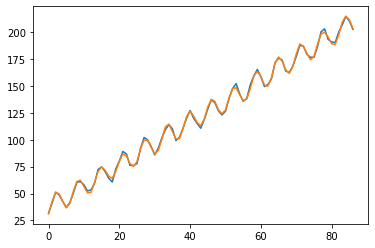

In [123]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(dfy[names],dfy["target"])
plt.plot(np.arange(len(df)),df["target"])
plt.plot(np.arange(len(df)),model.predict(dfy[names]))

In [124]:
last = dfy.iloc[-1]
prediction = []
n = []
for i in range(points-1):
  n.append(last["a"+str(i+1)])
n.append(last["target"])
n.append(model.predict(np.array(n).reshape(1,-1))[0])
prediction.append(n[-1])
for i in range(100):
  n = n[1:]
  n.append(model.predict(np.array(n).reshape(1,-1))[0])
  prediction.append(n[-1])

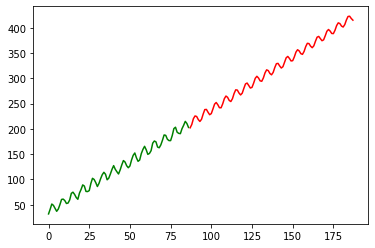

In [125]:
plt.plot(np.arange(len(dfy)),dfy["target"],c="green")
plt.plot(np.arange(len(dfy),len(dfy)+len(prediction)),prediction,c="red")

In [126]:
model.coef_

array([ 0.09775506,  0.07384972, -0.20241626, -0.17357293,  0.07038908,
        0.40170933,  0.3229617 ,  0.27391488, -0.00963497,  0.05379902,
        0.11787799, -0.02364915])

In [127]:
model.intercept_

10.448249366733677

#### Custom simple linear regression

In [128]:
tokyo_intl_df.index = pd.to_datetime(tokyo_intl_df['Date'])
tokyo_intl_df = tokyo_intl_df.drop("Date", axis = 1)
tokyo_intl_2020_df = tokyo_intl_df.loc['2020']
#x = tokyo_intl_2020_df['Celsius'] #2020 data only
y = tokyo_intl_2020_df['Celsius']

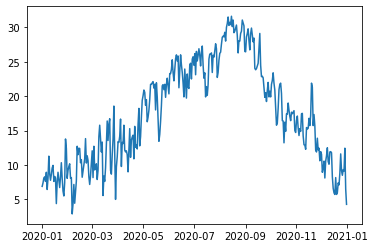

In [129]:
plt.plot(y)

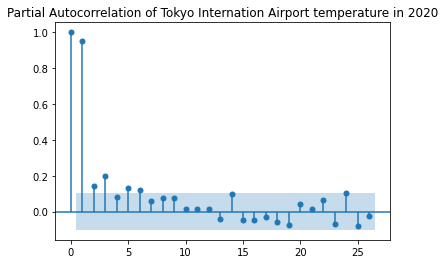

In [130]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
#y = np.random.rand(100)
plot_pacf(y)
plt.title("Partial Autocorrelation of Tokyo Internation Airport temperature in 2020")
pyplot.show()

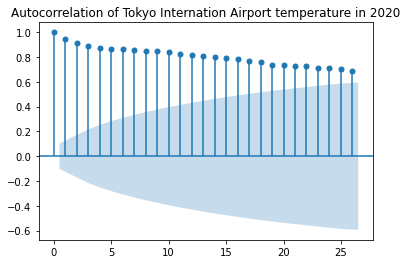

In [131]:
plot_acf(y)
plt.title("Autocorrelation of Tokyo Internation Airport temperature in 2020")
plt.show()

In [132]:
from statsmodels.tsa.stattools import adfuller
def adf_test(val):
    results = adfuller(val)
    print(results)
    print('p-value: ' + str(results[1]))

    # H0: the series is non-stationary (there's strong seasonality within)
    if (results[1] > 0.05):
        print("Cannot reject H0, series is non-stationary, can be represented by a unit root, has some time dependent structure")
    else:
        print('Reject H0, series is stationary')

adf_test(y)

(-1.2953432355470307, 0.6313000869415504, 5, 360, {'1%': -3.448645946352023, '5%': -2.869602139060357, '10%': -2.5710650077160495}, 1519.4879633386686)
p-value: 0.6313000869415504
Cannot reject H0, series is non-stationary, can be represented by a unit root, has some time dependent structure


(-9.744024294929025, 8.348344933930587e-17, 7, 357, {'1%': -3.44880082033912, '5%': -2.869670179576637, '10%': -2.5711012838861036}, 1514.7743420322436)
p-value: 8.348344933930587e-17
Reject H0, series is stationary


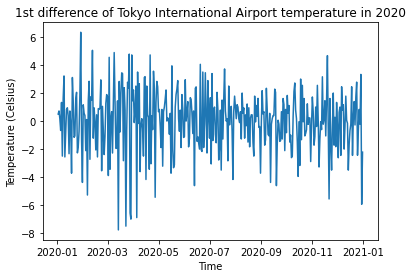

In [133]:
y_diff = y.diff(1)
y_diff = y_diff.dropna()
plt.plot(y_diff)
plt.xlabel('Time')
plt.ylabel('Temperature (Celsius)')
plt.title("1st difference of Tokyo International Airport temperature in 2020")
adf_test(y_diff)

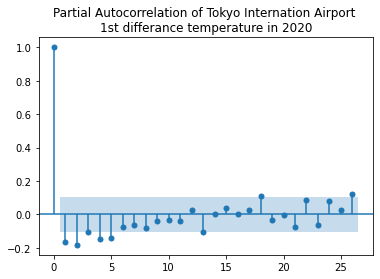

In [134]:
plot_pacf(y_diff)
plt.title("Partial Autocorrelation of Tokyo Internation Airport \n1st differance temperature in 2020")
pyplot.show()

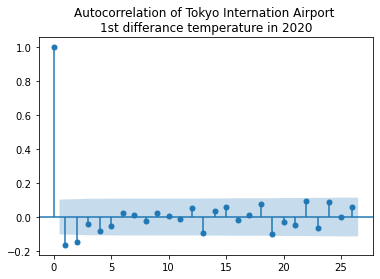

In [135]:
plot_acf(y_diff)
plt.title("Autocorrelation of Tokyo Internation Airport \n1st differance temperature in 2020")
pyplot.show()

In [136]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(y, lags=5, trend='n')
results = model.fit()

C:\Users\maidu\.conda\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\maidu\.conda\envs\tf\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


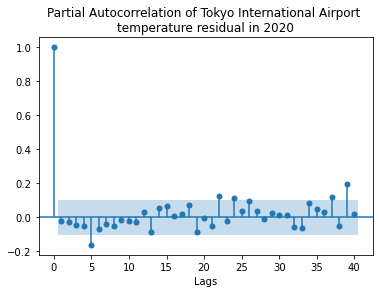

In [137]:
plot_pacf(resid, lags = 40)
plt.xlabel('Lags')
plt.title('Partial Autocorrelation of Tokyo International Airport \ntemperature residual in 2020')
plt.show()

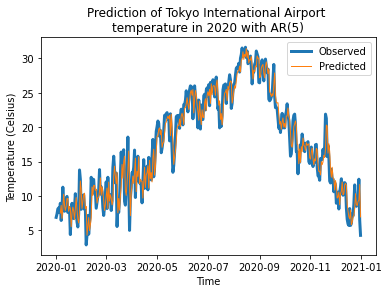

In [138]:
y_pred = results.predict()
plt.plot(y, label='Observed', linewidth=3)
plt.plot(y_pred, label='Predicted', linewidth=1)

plt.title('Prediction of Tokyo International Airport \ntemperature in 2020 with AR(5)')
plt.xlabel('Time')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()

In [139]:
print(results.summary())


                            AutoReg Model Results                             
Dep. Variable:                Celsius   No. Observations:                  366
Model:                     AutoReg(5)   Log Likelihood                -783.708
Method:               Conditional MLE   S.D. of innovations              2.121
Date:                Thu, 15 Apr 2021   AIC                              1.537
Time:                        20:34:31   BIC                              1.602
Sample:                    01-06-2020   HQIC                             1.563
                         - 12-31-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Celsius.L1     0.7660      0.052     14.682      0.000       0.664       0.868
Celsius.L2    -0.0071      0.066     -0.107      0.914      -0.137       0.122
Celsius.L3     0.0993      0.067      1.493      0.1

In [140]:
y_pred = y_pred.dropna()
adf_test(y_pred)

(-1.3886168254199343, 0.5877210255494223, 3, 357, {'1%': -3.44880082033912, '5%': -2.869670179576637, '10%': -2.5711012838861036}, 1313.5455969377613)
p-value: 0.5877210255494223
Cannot reject H0, series is non-stationary, can be represented by a unit root, has some time dependent structure


In [141]:
from sklearn.metrics import mean_squared_error
y = y[5:]
mean_squared_error(y, y_pred)

4.499629389505746

In [142]:
Jan_1st_to_June_28th = y[:180]
Jan_1st_to_June_28th

Date
2020-01-06     8.94
2020-01-07     6.44
2020-01-08     8.06
2020-01-09    11.28
2020-01-10     8.72
              ...  
2020-06-29    25.39
2020-06-30    25.72
2020-07-01    24.50
2020-07-02    26.17
2020-07-03    23.11
Name: Celsius, Length: 180, dtype: float64

In [143]:
from sklearn import preprocessing

Y_test = y[:180]
X_test = Y_test.index.to_julian_date()
X_test = np.array(X_test)
#X_test = preprocessing.normalize(X_test.reshape(-1,1))
Y_test = np.array(Y_test)


In [144]:
X_test

array([2458854.5, 2458855.5, 2458856.5, 2458857.5, 2458858.5, 2458859.5,
       2458860.5, 2458861.5, 2458862.5, 2458863.5, 2458864.5, 2458865.5,
       2458866.5, 2458867.5, 2458868.5, 2458869.5, 2458870.5, 2458871.5,
       2458872.5, 2458873.5, 2458874.5, 2458875.5, 2458876.5, 2458877.5,
       2458878.5, 2458879.5, 2458880.5, 2458881.5, 2458882.5, 2458883.5,
       2458884.5, 2458885.5, 2458886.5, 2458887.5, 2458888.5, 2458889.5,
       2458890.5, 2458891.5, 2458892.5, 2458893.5, 2458894.5, 2458895.5,
       2458896.5, 2458897.5, 2458898.5, 2458899.5, 2458900.5, 2458901.5,
       2458902.5, 2458903.5, 2458904.5, 2458905.5, 2458906.5, 2458907.5,
       2458908.5, 2458909.5, 2458910.5, 2458911.5, 2458912.5, 2458913.5,
       2458914.5, 2458915.5, 2458916.5, 2458917.5, 2458918.5, 2458919.5,
       2458920.5, 2458921.5, 2458922.5, 2458923.5, 2458924.5, 2458925.5,
       2458926.5, 2458927.5, 2458928.5, 2458929.5, 2458930.5, 2458931.5,
       2458932.5, 2458933.5, 2458934.5, 2458935.5, 

In [145]:
#good old ols :)
def get_coeff_b1(X,Y):
    a = [x-X.mean() for x in X]
    b = [y-Y.mean() for y in Y]
    a = np.array(a)
    b = np.array(b)
    c = np.dot(a,b)
    d = np.square(a).sum()
    b1 = c/d
    return b1

def get_intercept_b0(X, Y, b1):
    b1 = Y.mean() - b1*X.mean()
    return b1

def get_regression_line(b1,b0, X_min, X_max):
    #print("y_hat = ",b1,"*x + ",b0)
    y_hat = np.array([x*b1+b0 for x in range(X_min, X_max)])
    return y_hat
b1 = get_coeff_b1(X_test,Y_test)
b0 = get_intercept_b0(X_test,Y_test, b1)
y_hat = get_regression_line(b1, b0,2458849,2459029)
print('coeffient b1:', b1)
print('intercept b0:', b0)

coeffient b1: 0.10425878370731607
intercept b0: -256351.8669221804


In [146]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = X_test.reshape(-1,1)
reg = LinearRegression().fit(X, Y_test)
print('coeffient b1:',reg.coef_)
print('intercept b0:',reg.intercept_)
y_hat_LinReg = reg.predict(X_test.reshape(-1,1))

coeffient b1: [0.10425878]
intercept b0: -256351.86692218043


In [147]:
y_hat_LinReg.shape

(180,)

In [148]:
from sklearn.metrics import mean_squared_error
print("my LinReg MSE", mean_squared_error(y_hat, Y_test))
print("sklearn LinReg MSE", mean_squared_error(y_hat_LinReg, Y_test))

my LinReg MSE 8.171430849454485
sklearn LinReg MSE 7.842616556545637


Text(0.5, 1.0, 'Tokyo International Airport temperature\n from Jan 1st to June 28th 2020')

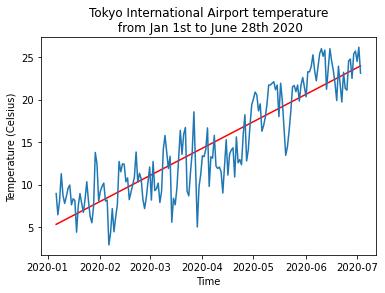

In [149]:
plt.plot(Jan_1st_to_June_28th.index ,y_hat_LinReg, color='r')
plt.plot(Jan_1st_to_June_28th.index , Y_test)
plt.xlabel('Time')
plt.ylabel('Temperature (Celsius)')
plt.title('Tokyo International Airport temperature\n from Jan 1st to June 28th 2020')

Accuracy of Linear Model :  0.40567399094226775
0.7389328651353889


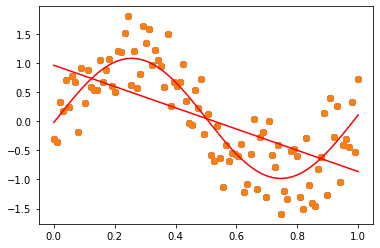

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Generating dataset :

# Y = A*sin(B(X + C)) + D
# A = Amplitude
# Period = 2*pi/B
# Period = Length of One Cycle
# C = Phase Shift (In Radian)
# D = Vertical Shift

X = np.linspace(0,1,100)   #(Start,End,Points)

# Here...
# A = 1
# B= 2*pi
# B = 2*pi/Period
# Period = 1
# C = 0
# D = 0

Y = 1*np.sin(2*np.pi*X)

# Adding some Noise :
Noise = 0.4*np.random.normal(size=100)
Y_data = Y + Noise
plt.scatter(X,Y_data,c="r")

# For straight line :
# Function to calculate the value :
def calc_line(X,m,b):
    return b + X*m

# It returns optimized parametes for our function :
# popt stores optimal parameters
# pcov stores the covarience between each parameters.
popt,pcov = curve_fit(calc_line,X,Y_data)

# Plot the main data :
plt.scatter(X,Y_data)

# Plot the best fit line :
plt.plot(X,calc_line(X,*popt),c="r")

# Check the accuracy of model :
Accuracy =r2_score(Y_data,calc_line(X,*popt))
print ("Accuracy of Linear Model : ",Accuracy)

# For sine curve :
# Calculate the value :
def calc_sine(x,a,b,c,d):
    return a * np.sin(b* ( x + np.radians(c))) + d

# Finding optimal parameters :
popt,pcov = curve_fit(calc_sine,X,Y_data)

# Plot the main data :
plt.scatter(X,Y_data)

# Plot the best fit curve :
plt.plot(X,calc_sine(X,*popt),c="r")

# Check the accuracy :
Accuracy =r2_score(Y_data,calc_sine(X,*popt))
print (Accuracy)